## Team members:
### Rosie Rong, Yingxin Lin, Tingwei Li
### Dataset: Global Terrorism Database
#### Dataset Source: https://www.start.umd.edu/gtd/about/
#### Dataset Download link: https://www.kaggle.com/START-UMD/gtd

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy import signal

In [259]:
Te = pd.read_csv("Global Terrorism 1970-2017.csv",encoding='latin-1')

In [260]:
Te.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'success',
       'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1_txt', 'gname', 'motive', 'weaptype1_txt',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid'],
      dtype='object')

In [261]:
Iraq_war = Te.loc[(Te['iyear']>=2003)&(Te['iyear']<=2011)&(Te['country_txt']=='Iraq')]
Iraq_war.tail(3)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid
104767,2.011120e+11,2011,12,30,0,Iraq,Middle East & North Africa,Kirkuk,Dibis,35.669381,...,0.0,1.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,The home sustained some damage,0.0
104773,2.011120e+11,2011,12,31,0,Iraq,Middle East & North Africa,Diyala,Khan Bani Saad,33.571807,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,No property damage reported,0.0
104775,2.011120e+11,2011,12,31,0,Iraq,Middle East & North Africa,Kirkuk,Kirkuk,35.452110,...,0.0,1.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,The car was damaged,0.0


In [262]:
local_war = Te.loc[(Te['iyear']>=2012)&(Te['iyear']<=2014)&(Te['country_txt']=='Iraq')]
local_war.tail(3)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid
142216,2.014120e+11,2014,12,31,1,Iraq,Middle East & North Africa,Saladin,Tarmiyah,33.669689,...,0.0,NaN,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A house was damaged in this attack.,1.0
142217,2.014120e+11,2014,12,31,0,Iraq,Middle East & North Africa,Nineveh,Tal Afar,36.376823,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,The walls of an ancient citadel were destroyed...,0.0
142218,2.014120e+11,2014,12,31,0,Iraq,Middle East & North Africa,Nineveh,Qayyarah,35.778622,...,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,A bridge was destroyed in this attack.,0.0


In [263]:
post_war = Te.loc[(Te['iyear']>=2015)&(Te['iyear']<=2017)&(Te['country_txt']=='Iraq')]
post_war.tail(3)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid
181671,2.017120e+11,2017,12,31,0,Iraq,Middle East & North Africa,Saladin,Farhatiyah,34.031331,...,0.0,9.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0
181674,2.017120e+11,2017,12,31,0,Iraq,Middle East & North Africa,Nineveh,Baaj,36.045059,...,5.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0
181679,2.017120e+11,2017,12,31,0,Iraq,Middle East & North Africa,Diyala,Muqdadiyah,33.953167,...,13.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0


In [264]:
whole_Iraq = Te.loc[(Te['iyear']>=2003)&(Te['iyear']<=2017)&(Te['country_txt']=='Iraq')]
whole_Iraq.head(3)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid
75109,2.003020e+11,2003,2,8,0,Iraq,Middle East & North Africa,Unknown,Qamesh Tapa,NaN,...,0.0,1.0,0.0,0.0,-9,4.0,Unknown,NaN,Unknown,1.0
75189,2.003020e+11,2003,2,26,0,Iraq,Middle East & North Africa,Sulaymaniyah,Halabjah,35.183333,...,1.0,0.0,0.0,0.0,-9,4.0,Unknown,NaN,NaN,0.0
75274,2.003030e+11,2003,3,13,0,Iraq,Middle East & North Africa,Unknown,Unknown,NaN,...,1.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,The explosion shattered windows of nearby homes.,0.0


# Yingxin Lin
## Total death, US citizens death, percentage of US citizens death, 2003-2017

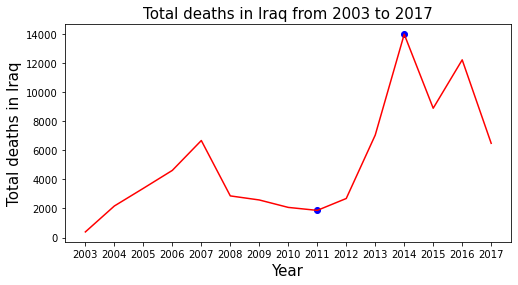

In [265]:
# Total deaths in Iraq from 2003 to 2017
total_kill_Iraq = whole_Iraq.groupby("iyear", as_index = False)["nkill"].sum()
#print(total_kill_Iraq)
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(total_kill_Iraq.iyear, total_kill_Iraq.nkill, color="r")
plt.scatter(total_kill_Iraq.loc[total_kill_Iraq['iyear']==2011]['iyear'], total_kill_Iraq.loc[total_kill_Iraq['iyear']==2011]['nkill'], color="b",marker='o')
plt.scatter(total_kill_Iraq.loc[total_kill_Iraq['iyear']==2014]['iyear'], total_kill_Iraq.loc[total_kill_Iraq['iyear']==2014]['nkill'], color="b",marker='o')
plt.xlabel("Year",fontsize=15)
plt.xticks(np.arange(2003, 2018, step=1))
plt.ylabel("Total deaths in Iraq",fontsize=15)
plt.title("Total deaths in Iraq from 2003 to 2017",fontsize=15)
plt.show()

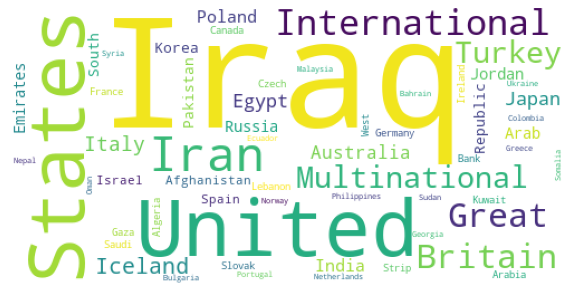

In [266]:
# The nationality of the target that was attacked in the Iraq war(2003-2011)
naldetails_Iraq=Iraq_war.natlty1_txt.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250,collocations=False).generate(' '.join(naldetails_Iraq))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

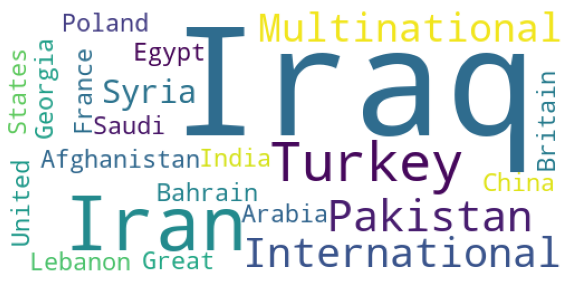

In [267]:
# The nationality of the target that was attacked in the local war(2011-2014)
naldetails_local=local_war.natlty1_txt.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250,collocations=False).generate(' '.join(naldetails_local))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

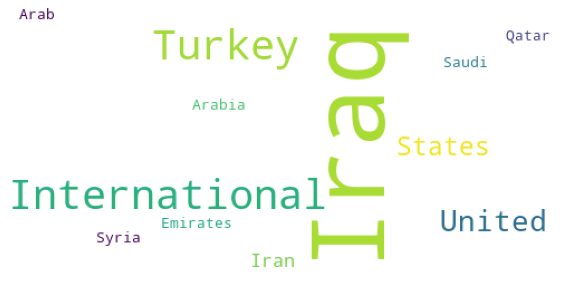

In [268]:
# The nationality of the target that was attacked in the post war(2014-2017)
naldetails_post=post_war.natlty1_txt.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250,collocations=False).generate(' '.join(naldetails_post))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

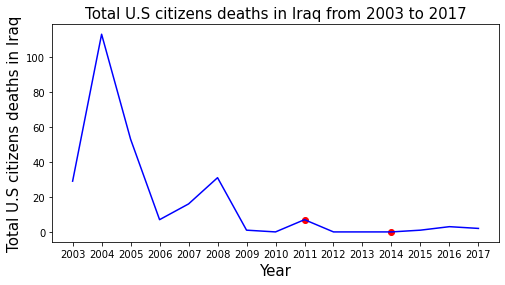

In [270]:
# Total U.S citizens deaths in Iraq from 2003 to 2017
us_kill_Iraq = whole_Iraq.groupby("iyear", as_index = False)["nkillus"].sum()
#print(us_kill_Iraq)
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(us_kill_Iraq.iyear, us_kill_Iraq.nkillus, color="b")
plt.scatter(us_kill_Iraq.loc[us_kill_Iraq['iyear']==2011]['iyear'], us_kill_Iraq.loc[us_kill_Iraq['iyear']==2011]['nkillus'], color="r",marker='o')
plt.scatter(us_kill_Iraq.loc[us_kill_Iraq['iyear']==2014]['iyear'], us_kill_Iraq.loc[us_kill_Iraq['iyear']==2014]['nkillus'], color="r",marker='o')
plt.xlabel("Year",fontsize=15)
plt.xticks(np.arange(2003, 2018, step=1))
plt.ylabel("Total U.S citizens deaths in Iraq",fontsize=15)
plt.title("Total U.S citizens deaths in Iraq from 2003 to 2017",fontsize=15)
plt.show()

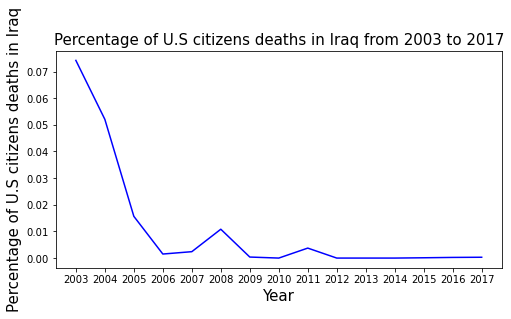

In [271]:
# Percentage U.S citizens deaths in Iraq from 2003 to 2017
per_us_kill_Iraq = pd.DataFrame(columns=['year','per_us'])
years = list(us_kill_Iraq['iyear'])
for year in years:
    per_us = us_kill_Iraq.loc[us_kill_Iraq['iyear']==year]["nkillus"].sum()/total_kill_Iraq.loc[total_kill_Iraq['iyear']==year]["nkill"].sum()
    per_us_kill_Iraq = per_us_kill_Iraq.append({'year':year,'per_us':per_us},ignore_index=True)
    
#print(per_us_kill_Iraq)
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(per_us_kill_Iraq.year, per_us_kill_Iraq.per_us, color="b")
plt.xlabel("Year",fontsize=15)
plt.xticks(np.arange(2003, 2018, step=1))
plt.ylabel("Percentage of U.S citizens deaths in Iraq",fontsize=15)
plt.title("Percentage of U.S citizens deaths in Iraq from 2003 to 2017",fontsize=15)
plt.show()

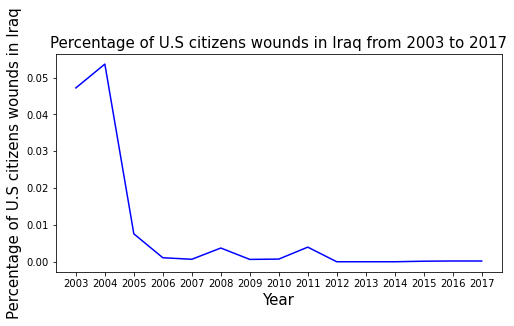

In [272]:
us_wound = whole_Iraq.groupby("iyear", as_index = False)["nwoundus"].sum()
# Percentage U.S citizens wounds in Iraq from 2003 to 2017
per_us_wound = pd.DataFrame(columns=['year','per_us_wound'])
years = list(us_wound['iyear'])
for year in years:
    per_us_wound_number = us_wound.loc[us_wound['iyear']==year]["nwoundus"].sum()/whole_Iraq.loc[whole_Iraq['iyear']==year]["nwound"].sum()
    per_us_wound = per_us_wound.append({'year':year,'per_us_wound':per_us_wound_number},ignore_index=True)

# Plot it
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(per_us_wound.year, per_us_wound.per_us_wound, color="b")
plt.xlabel("Year",fontsize=15)
plt.xticks(np.arange(2003, 2018, step=1))
plt.ylabel("Percentage of U.S citizens wounds in Iraq",fontsize=15)
plt.title("Percentage of U.S citizens wounds in Iraq from 2003 to 2017",fontsize=15)
plt.show()

## Weapons used in each phase

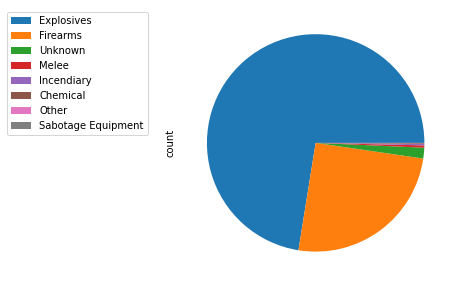

In [186]:
weap_Iraq = Iraq_war.groupby("weaptype1_txt")['eventid'].count().reset_index(name='count').sort_values(['count'], ascending=False)
weap_Iraq.plot.pie(y='count', figsize=(10, 5),labels=['','','','','','','','',''])
plt.legend(weap_Iraq['weaptype1_txt'], loc='upper right',bbox_to_anchor=(-0.1, 1.))
plt.show()

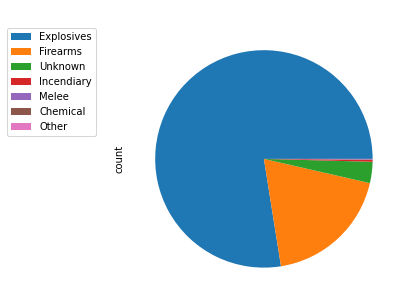

In [185]:
weap_local = local_war.groupby("weaptype1_txt")['eventid'].count().reset_index(name='count').sort_values(['count'], ascending=False)
weap_local.plot.pie(y='count', figsize=(10, 5),labels=['','','','','','','','',''])
plt.legend(weap_local['weaptype1_txt'], loc='upper right',bbox_to_anchor=(-0.1, 1.))
plt.show()

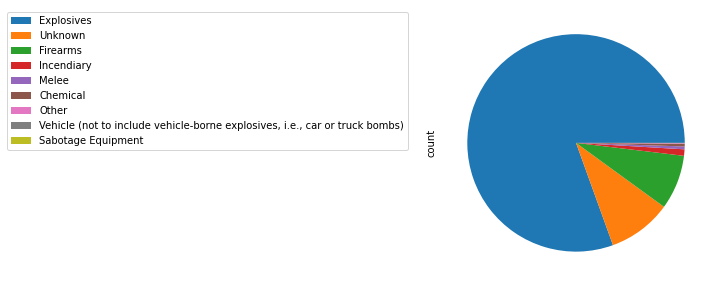

In [187]:
weap_post = post_war.groupby("weaptype1_txt")['eventid'].count().reset_index(name='count').sort_values(['count'], ascending=False)
weap_post.plot.pie(y='count', figsize=(10, 5),labels=['','','','','','','','',''])
plt.legend(weap_post['weaptype1_txt'], loc='upper right',bbox_to_anchor=(-0.1, 1.))
plt.show()

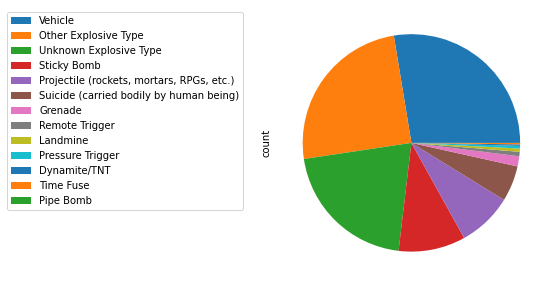

In [190]:
sub_weap_Iraq = Iraq_war.loc[Iraq_war['weaptype1_txt']=='Explosives'].groupby("weapsubtype1_txt")['eventid'].count().reset_index(name='count').sort_values(['count'], ascending=False)
sub_weap_Iraq['per'] = sub_weap_Iraq['count']/sub_weap_Iraq['count'].sum()
sub_weap_Iraq.plot.pie(y='count', figsize=(10, 5),labels=['','','','','','','','','','','','',''])
plt.legend(sub_weap_Iraq['weapsubtype1_txt'], loc='upper right',bbox_to_anchor=(-0.1, 1.))
plt.show()

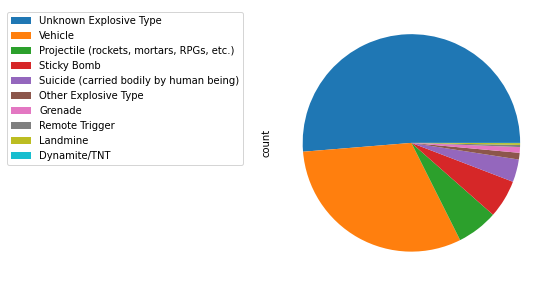

In [191]:
sub_weap_local = local_war.loc[local_war['weaptype1_txt']=='Explosives'].groupby("weapsubtype1_txt")['eventid'].count().reset_index(name='count').sort_values(['count'], ascending=False)
sub_weap_local['per'] = sub_weap_local['count']/sub_weap_local['count'].sum()
sub_weap_local.plot.pie(y='count', figsize=(10, 5),labels=['','','','','','','','','','','','',''])
plt.legend(sub_weap_local['weapsubtype1_txt'], loc='upper right',bbox_to_anchor=(-0.1, 1.))
plt.show()

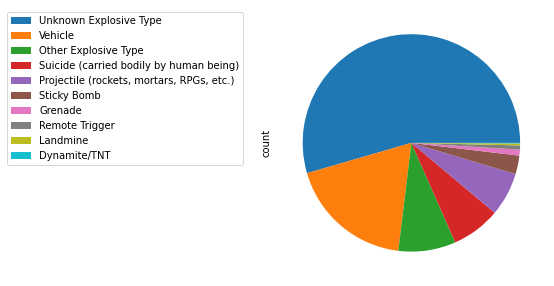

In [192]:
sub_weap_post = post_war.loc[post_war['weaptype1_txt']=='Explosives'].groupby("weapsubtype1_txt")['eventid'].count().reset_index(name='count').sort_values(['count'], ascending=False)
sub_weap_post['per'] = sub_weap_post['count']/sub_weap_post['count'].sum()
sub_weap_post.plot.pie(y='count', figsize=(10, 5),labels=['','','','','','','','','','','','',''])
plt.legend(sub_weap_post['weapsubtype1_txt'], loc='upper right',bbox_to_anchor=(-0.1, 1.))
plt.show()

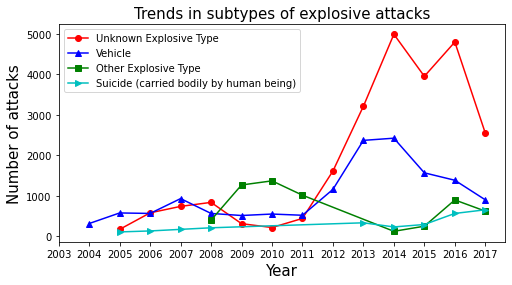

In [299]:
tmp = pd.DataFrame(whole_Iraq,columns=['iyear',  'weaptype1_txt',  'weapsubtype1_txt'])
tmp = tmp.loc[tmp['weaptype1_txt']=='Explosives']
weapsubtypes = list(np.unique(whole_Iraq['weapsubtype1_txt'].dropna()))
years=np.arange(2003,2018,1)
new_tmp = pd.DataFrame(columns=['year','weapsubtype','count'])
for year in years:
    for weapsub in weapsubtypes:
        tmp_count = tmp.loc[(tmp['iyear']==year) & (tmp['weapsubtype1_txt'] == weapsub)].size
        new_tmp = new_tmp.append({'year':year,'weapsubtype':weapsub,'count':tmp_count}, ignore_index=True)
        
new_tmp['count'] = new_tmp['count'].astype(int)
new_tmp['year'] = new_tmp['year'].astype(int)
new_tmp_2 = new_tmp.loc[new_tmp['count']>100]
#print(new_tmp_2)
targets = ['Unknown Explosive Type', 'Vehicle', 'Other Explosive Type',
          'Suicide (carried bodily by human being)']
#colors = ['darked', 'firebrick', 'indianred','lightcoral','rosybrown']
colors = ['r','b','g','c','m','y']
markers=['o','^','s','>','<']
for target, c, m in zip(targets,colors,markers):
    indicesToKeep = new_tmp_2.loc[new_tmp_2["weapsubtype"] == target]
    plt.plot(indicesToKeep['year'], indicesToKeep['count'], color=c, marker = m)
plt.xticks(range(2003,2018))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.title("Trends in subtypes of explosive attacks",fontsize=15)
plt.legend(targets)
plt.show()
#bcr.bar_chart_race(df=new_tmp, filename=None)

## Rosie Rong

C:\Users\yxlin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


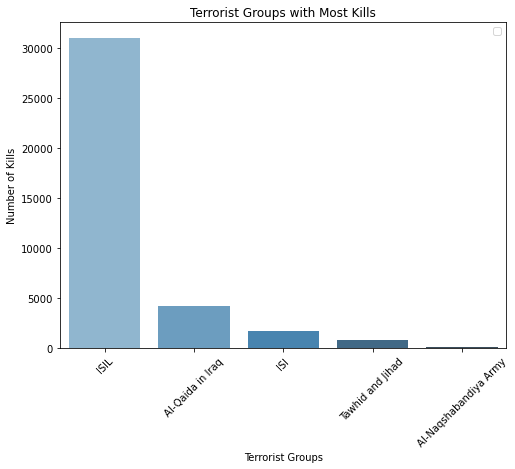

In [273]:
war = Iraq_war.append(local_war).append(post_war)
ter = war.groupby('gname')['nkill'].sum().reset_index()
ter = ter.sort_values(by='nkill',ascending=False).head(6)
ter = ter[ter['gname']!='Unknown']
#ticks = np.array(['ISIL','Al-Qaida in Iraq','ISI','Tawhid and Jihad','Al-Naqshabandiya Army','Ansar al-Sunna','Muslim extremists','MCTR','Asaib Ahl al-Haqq'])
plt.subplots(figsize=(8,6))
sns.barplot(ter['gname'],ter['nkill'],palette='Blues_d')
plt.title('Terrorist Groups with Most Kills')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of Kills')
ax = plt.gca()
ax.set_xticklabels(['ISIL','Al-Qaida in Iraq','ISI','Tawhid and Jihad','Al-Naqshabandiya Army'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [274]:
ter

,gname,nkill
36,Islamic State of Iraq and the Levant (ISIL),31058.0
7,Al-Qaida in Iraq,4273.0
35,Islamic State of Iraq (ISI),1726.0
76,Tawhid and Jihad,844.0
4,Al-Naqshabandiya Army,165.0


In [275]:
teryear = war.groupby(['iyear','gname'])['nkill'].sum().reset_index()
teryear = teryear[teryear['gname']!='Unknown']
teryear = teryear.sort_values(by=['iyear','nkill'],ascending=[True, False])
teryear =teryear.groupby('iyear').head(3)
teryear
#plt.figure(figsize=(10,6))
#plt.xticks(range(2003,2018))
#plt.xlabel('Year')
#plt.title('Wounds and Kills by Years')
#plt.legend(['Wounds and Kills','Kills'])

,iyear,gname,nkill
4,2003,Tawhid and Jihad,104.0
1,2003,Ansar al-Islam,26.0
2,2003,Armed Vanguards of a Second Mohammed Army,24.0
24,2004,Tawhid and Jihad,740.0
8,2004,Al-Qaida in Iraq,69.0
11,2004,Ansar al-Sunna,54.0
26,2005,Al-Qaida in Iraq,745.0
28,2005,Ansar al-Sunna,110.0
42,2005,Sunni Muslim extremists,39.0
46,2006,Al-Qaida in Iraq,99.0


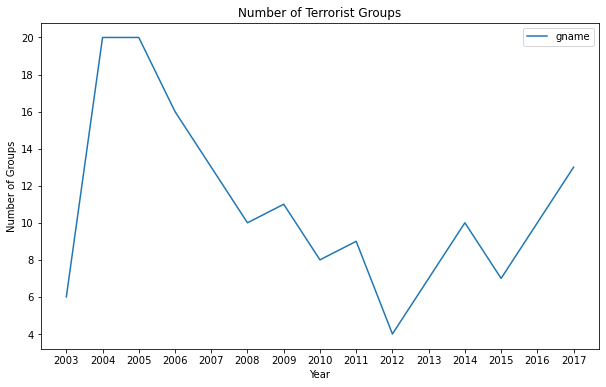

In [276]:
nter = war.groupby('iyear')['gname'].nunique().reset_index()
nter.plot(x='iyear', y='gname',figsize=(10,6))
plt.xticks(range(2003,2018))
plt.title('Number of Terrorist Groups')
plt.xlabel('Year')
plt.ylabel('Number of Groups')
plt.show()

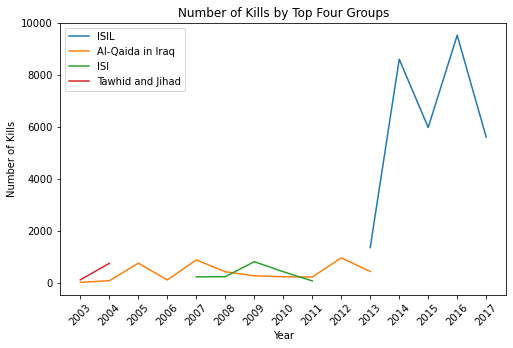

In [277]:
ISIL = war[war['gname']=='Islamic State of Iraq and the Levant (ISIL)']
ISIL = ISIL.groupby('iyear')['nkill'].sum().reset_index()
ISIL.columns=['iyear','ISIL']
AI = war[war['gname']=='Al-Qaida in Iraq']
AI = AI.groupby('iyear')['nkill'].sum().reset_index()
AI.columns=['iyear','Al-Qaida in Iraq']
ISI = war[war['gname']=='Islamic State of Iraq (ISI)']
ISI = ISI.groupby('iyear')['nkill'].sum().reset_index()
ISI.columns=['iyear','ISI']
TJ = war[war['gname']=='Tawhid and Jihad']
TJ = TJ.groupby('iyear')['nkill'].sum().reset_index()
TJ.columns=['iyear','Tawhid and Jihad']
three=ISIL.merge(AI,how='outer')
three=three.merge(ISI,how='outer')
four=three.merge(TJ,how='outer')
four=four.sort_values(by='iyear')
plt.figure(figsize=(8,5))
plt.plot(four['iyear'], four['ISIL'],four['iyear'],four['Al-Qaida in Iraq'],four['iyear'],four['ISI'],four['iyear'],four['Tawhid and Jihad'])
plt.xticks(range(2003,2018),rotation=45)
plt.title('Number of Kills by Top Four Groups')
plt.xlabel('Year')
plt.ylabel('Number of Kills')
plt.legend(['ISIL','Al-Qaida in Iraq','ISI','Tawhid and Jihad'])
plt.show()

<ipython-input-278-c90d92a13f9d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  k_w = k_w.groupby('iyear')['nwound','nkill'].sum().reset_index()
<ipython-input-278-c90d92a13f9d>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iraq = iraq.groupby('iyear')['nwound','nkill'].sum().reset_index()


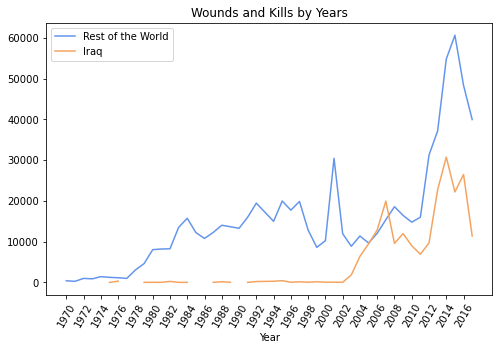

In [278]:
k_w = Te[Te['country_txt']!='Iraq']
k_w = k_w.groupby('iyear')['nwound','nkill'].sum().reset_index()
k_w['Global'] = k_w['nwound']+k_w['nkill']
iraq = Te[Te['country_txt']=='Iraq']
iraq = iraq.fillna (0)
iraq = iraq.groupby('iyear')['nwound','nkill'].sum().reset_index()
iraq['Iraq'] = iraq['nwound']+iraq['nkill']
iraq.columns=['iyear','iwound','ikill','Iraq']
glob=pd.merge(k_w,iraq,on=['iyear'],how='outer')
glob
plt.figure(figsize=(8,5))
plt.xticks(range(1970,2017,2))
plt.xticks(rotation=60)
plt.plot(glob['iyear'], glob['Global'],'cornflowerblue',glob['iyear'],glob['Iraq'],'sandybrown')
plt.xlabel('Year')
plt.title('Wounds and Kills by Years')
plt.legend(['Rest of the World','Iraq'])

Text(0.5, 1.0, 'Iraq Wounds and Kills under Terrorist Attacks')

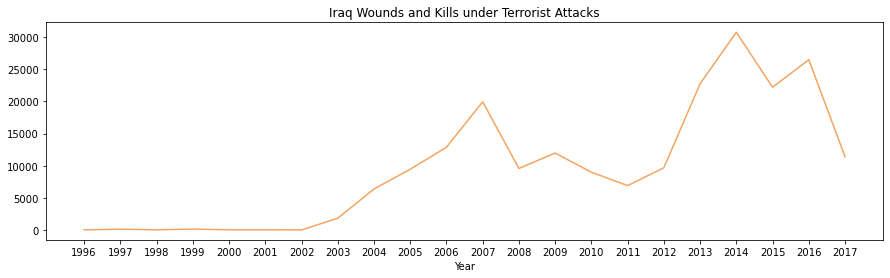

In [279]:
glob = glob[glob['iyear']>=1996]
plt.figure(figsize=(15,4))
plt.xticks(range(1970,2017,2))
plt.xticks(rotation=0)
plt.plot(glob['iyear'],glob['Iraq'],'sandybrown')
plt.xlabel('Year')
plt.xticks(range(1996,2018))
plt.title('Iraq Wounds and Kills under Terrorist Attacks')

Text(0.5, 1.0, 'Regression between Iraq and Rest of the World')

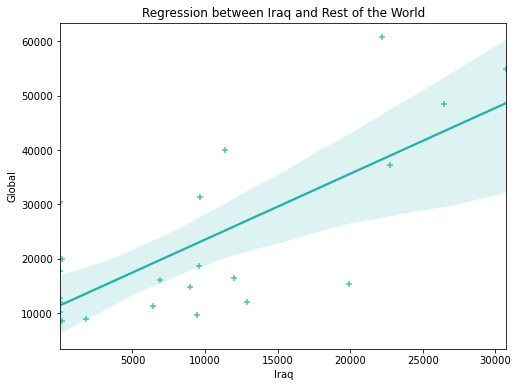

In [280]:
plt.figure(figsize=(8,6))
sns.regplot(x=glob.Iraq, y=glob.Global, color='lightseagreen', marker='+')
plt.title('Regression between Iraq and Rest of the World')

Text(0.5, 1.0, 'Correlation between Iraq and Rest of the World')

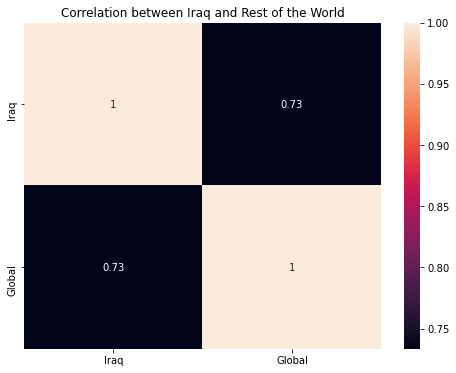

In [281]:
Global = glob.Global
Iraq = glob.Iraq
data=pd.DataFrame({'Iraq':Iraq,'Global':Global})
data
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation between Iraq and Rest of the World')

# Tingwei Li
### Suicide

In [282]:
Suicide = Te.loc[(Te['suicide']==1)&(Te['country_txt']=='Iraq')&(Te['iyear']>=2003)&(Te['iyear']<=2017)]
Iraq = Te.loc[(Te['country_txt']=='Iraq')&(Te['iyear']>=2003)&(Te['iyear']<=2017)]

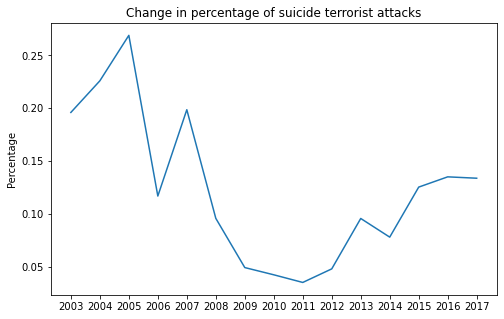

In [283]:
Suicide_gro = Suicide.groupby(['iyear'], as_index=False)['eventid'].count()
Iraq_gro = Iraq.groupby(['iyear'], as_index=False)['eventid'].count()

plt.figure(figsize=(8,5))
#plt.xticks(np.range())
#print(Suicide_gro)
plt.title("Change in percentage of suicide terrorist attacks")
plt.xticks(range(2003,2018))
plt.ylabel('Percentage')
plt.plot(Suicide_gro['iyear'],Suicide_gro['eventid']/Iraq_gro['eventid'])

### Success Rate

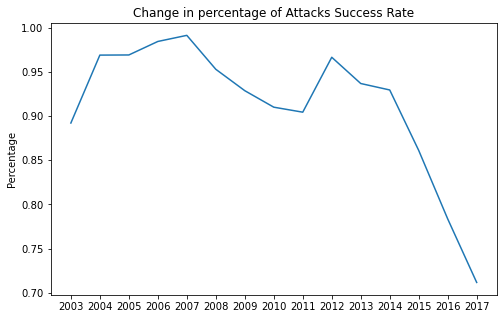

In [284]:
# Attack Success Rate
Success = Te.loc[(Te['success']==1)&(Te['country_txt']=='Iraq')&(Te['iyear']>=2003)&(Te['iyear']<=2017)]
Iraq = Te.loc[(Te['country_txt']=='Iraq')&(Te['iyear']>=2003)&(Te['iyear']<=2017)]

Success_gro = Success.groupby(['iyear'], as_index=False)['eventid'].count()
#print(Success_gro)

Iraq_gro = Iraq.groupby(['iyear'], as_index=False)['eventid'].count()
#print(Iraq_gro)

plt.figure(figsize=(8,5))
#plt.xticks(np.range())
plt.title("Change in percentage of Attacks Success Rate")
plt.xticks(range(2003,2018))
plt.ylabel('Percentage')
plt.plot(Success_gro['iyear'],Success_gro['eventid']/Iraq_gro['eventid'])

### Heatmap

In [285]:
heatmap = Te.loc[Te['imonth']!=0]

In [286]:
df_heatmap = heatmap.groupby(['iyear','imonth'], as_index=False)['eventid'].count()
df_heatmap

,iyear,imonth,eventid
0,1970,1,39
1,1970,2,55
2,1970,3,69
3,1970,4,79
4,1970,5,72
...,...,...,...
559,2017,8,968
560,2017,9,838
561,2017,10,805
562,2017,11,804


In [287]:
df_h = df_heatmap.set_index(['imonth','iyear'])['eventid']
df = df_h.unstack()

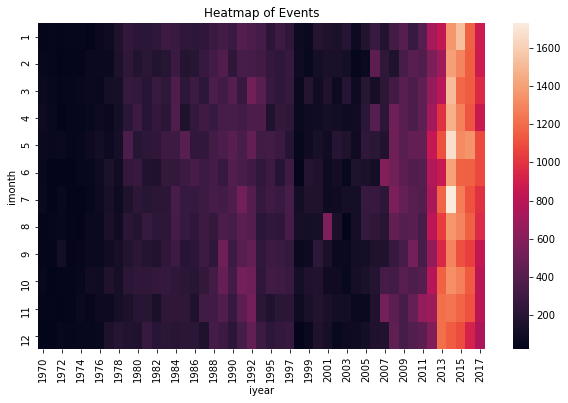

In [288]:
#heatmap = 
#h = df.pivot("iyear","imonth",'eventid')
plt.figure(figsize=(10,6))
plt.title("Heatmap of Events")
ax = sns.heatmap(df)
plt.savefig('heatmap')

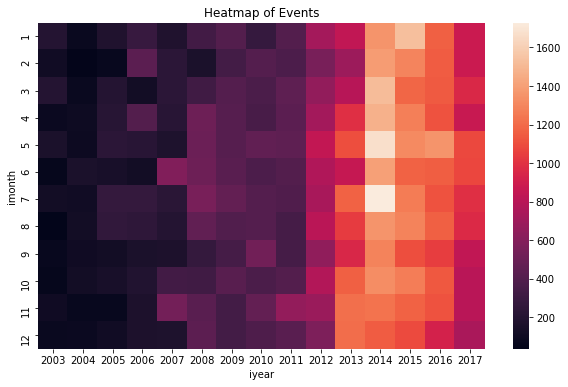

In [289]:
heatmap2 = Te.loc[(Te['imonth']!=0)&(Te['iyear']>=2003)&(Te['iyear']<=2017)]


df_heatmap2 = heatmap2.groupby(['iyear','imonth'], as_index=False)['eventid'].count()
df_heatmap2

df_h2 = df_heatmap2.set_index(['imonth','iyear'])['eventid']
df = df_h2.unstack()
plt.figure(figsize=(10,6))
plt.title("Heatmap of Events")
ax = sns.heatmap(df)
#plt.savefig('heatmap')

### Suicide

2601 24456


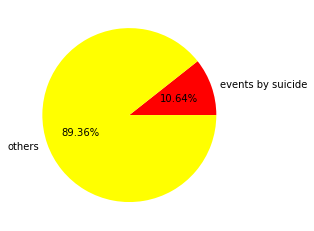

In [293]:
#% of suicide attacks across time (increase? Constant? why)
Suicide = Te.loc[(Te['suicide']==1)&(Te['country_txt']=='Iraq')&(Te['iyear']>=2003)&(Te['iyear']<=2017)]
Iraq = Te.loc[(Te['country_txt']=='Iraq')&(Te['iyear']>=2003)&(Te['iyear']<=2017)]

#Suicide_gro = Suicide.groupby(['targtype1_txt','iyear'], as_index=False)['nkill'].count()
# Suicide
sui_eve = Suicide['eventid'].count()
sum_eve = Iraq['eventid'].count()
others = sum_eve-sui_eve

pie = [sui_eve,others]
pie_labels = ['events by suicide','others']
plt.pie(pie,labels=pie_labels,autopct='%1.2f%%',colors=('red','yellow'))

print(sui_eve,sum_eve)

### Target Type

C:\Users\yxlin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top5 Target Type(2003-2011)'}, xlabel='targtype1_txt', ylabel='eventid'>

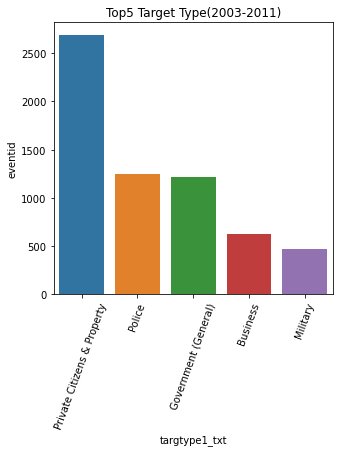

In [296]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=70)
plt.title("Top5 Target Type(2003-2011)")

IrW_gro = Iraq_war.groupby('targtype1_txt', as_index=False)['eventid'].count()
IrW_gro1 = IrW_gro.sort_values(by='eventid',ascending=False)
IrW_gro2 = IrW_gro1.head(5)
sns.barplot(IrW_gro2['targtype1_txt'],IrW_gro2['eventid'], ci=None, palette=["C0", "C1", "C2","C3","C4"])

C:\Users\yxlin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top5 Target Type(2012-2014)'}, xlabel='targtype1_txt', ylabel='eventid'>

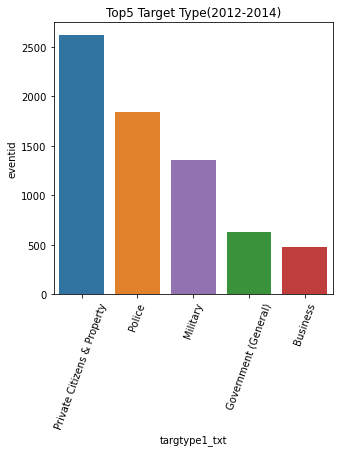

In [297]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=70)
plt.title("Top5 Target Type(2012-2014)")
IoW_gro = local_war.groupby('targtype1_txt', as_index=False)['eventid'].count()
IoW_gro1 = IoW_gro.sort_values(by='eventid',ascending=False)
IoW_gro2 = IoW_gro1.head(5)
sns.barplot(IoW_gro2['targtype1_txt'],IoW_gro2['eventid'],palette=["C0", "C1", "C4","C2","C3"])

C:\Users\yxlin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top5 Target Type(2014-2017)'}, xlabel='targtype1_txt', ylabel='eventid'>

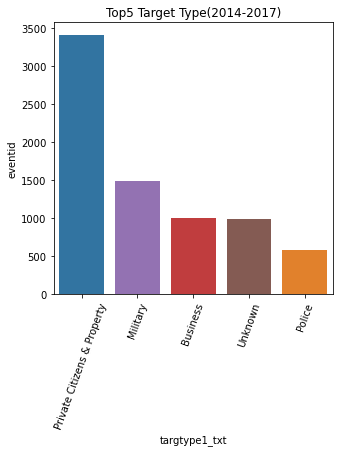

In [298]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=70)
plt.title("Top5 Target Type(2014-2017)")
PoW_gro = post_war.groupby('targtype1_txt', as_index=False)['eventid'].count()
PoW_gro1 = PoW_gro.sort_values(by='eventid',ascending=False)
PoW_gro2 = PoW_gro1.head(5)
sns.barplot(PoW_gro2['targtype1_txt'],PoW_gro2['eventid'],palette=["C0", "C4", "C3","C5","C1"])